# P3 


This project gives you experience with getting data from the web. 



In [1]:
!pip install html5lib lxml

In [2]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests 
import re
import os
import datetime
import json
from io import StringIO

from getpass import getpass

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import otter
grader = otter.Notebook()

if re.search(r'amzn', os.uname().release):
    GS = True
else:
    GS = False

**NOTE** A note on grading for this project.  
Each question has the total points listed which will be split between autograding methods and manual grading; make sure you review your code to achieve the requested result.   

## Q1 - (6 pts total)

Scrape [https://www.data.gov](https://www.data.gov) to identify and print out the number of data sets available.

In [3]:
site = requests.get('https://www.data.gov').text
q1 = BeautifulSoup(site, 'html5lib')

In [4]:
q1_num_datasets = int(q1.find('div', class_='hero__dataset-count').find('span', class_='text-color-red').text.replace(',', ''))
print("The number of datasets is", str(q1_num_datasets))

The number of datasets is 301368


In [5]:
grader.check("q1")

q1 results: All test cases passed!

## Q2 - (30 pts total) 

From the list of top 200 most popular names for babies born in the US in the 2010s.  We are interested in the names that start with 'W' or contain a letter  'P' or 'p'.  

Create a DataFrame with the names that start with 'W' or contain a letter  'P' or 'p' (for both male and female together), their rank, and the number of times the name is used.  DataFrame has four columns: "Rank" - int, "Names" - str, "Number" - int, and "Gender" - str - "Male"/"Female". 

Examples names from the table are: 
* 3, Sophia, 181091, Female
* 4, William, 159893, Male
* ...
* 37, Wyatt, 87711, Male
* ...
* 44, Penelope, 47602, Female
* ... 

Display the first 10 rows of the DataFrame, sorted by decreasing number.  Also, print out the sum of the number of the 'W' names and the sum of the number of names with 'P' or 'p'.  

Data available at: https://www.ssa.gov/OACT/babynames/decades/names2010s.html

In [6]:
site = requests.get('https://www.ssa.gov/OACT/babynames/decades/names2010s.html').text
q2 = BeautifulSoup(site, 'html5lib')

In [7]:
# Create a DataFrame 'names' for the names that start with W or have a P/p
# The 'names' DataFrame has four colummns: 
#   'Rank' (int) 
#   'Name' (str)
#   'Num' (int) 
#   'Gender' (str) 'Female' / 'Male'

table = q2.find('table', class_='t-stripe')
data = []

for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    
    if len(cols) == 5:  #Make sure that all the 5columns are here
        rank = int(cols[0].text.strip())
        male_name = cols[1].text.strip()
        male_count = int(cols[2].text.strip().replace(',', ''))
        female_name = cols[3].text.strip()
        female_count = int(cols[4].text.strip().replace(',', ''))

        #Add Male names
        if male_name.startswith('W') or 'P' in male_name or 'p' in male_name:
            data.append([rank, male_name, male_count, 'Male'])
        #Add Female names
        if female_name.startswith('W') or 'P' in female_name or 'p' in female_name:
            data.append([rank, female_name, female_count, 'Female'])

names = pd.DataFrame(data, columns=['Rank', 'Name', 'Num', 'Gender'])

numWnames = names[names['Name'].str.startswith('W')]['Num'].sum()
numPnames = names[names['Name'].str.contains('P|p')]['Num'].sum()

print("Total number of names that start with W  : " + str(numWnames))
print("Total number of names that contain P/p   : " + str(numPnames))

names.head(10)

Total number of names that start with W  : 334604
Total number of names that contain P/p   : 915013


,Rank,Name,Num,Gender
0,3,Sophia,181091,Female
1,4,William,159893,Male
2,16,Harper,85168,Female
3,20,Joseph,115642,Male
4,27,Christopher,102084,Male
5,37,Wyatt,87711,Male
6,44,Penelope,47602,Female
7,64,Peyton,39603,Female
8,72,Paisley,37556,Female
9,79,Sophie,35666,Female


In [8]:
grader.check("q2")

q2 results: All test cases passed!

## Q3 - (54 pts total) 

Browse through the following fake online bookstore: http://books.toscrape.com/. This website is meant for toying with scraping.

Your job is to scrape the website, collecting data on all books that have:
- **_at least_ a four-star rating**, and
- **a price _strictly_ less than £50**, and 
- **belong to specific categories** (more details below). 

You will extract the information into a DataFrame that looks like the one below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>UPC</th>
      <th>Product Type</th>
      <th>Price (excl. tax)</th>
      <th>Price (incl. tax)</th>
      <th>Tax</th>
      <th>Availability</th>
      <th>Number of reviews</th>
      <th>Category</th>
      <th>Rating</th>
      <th>Description</th>
      <th>Title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>e10e1e165dc8be4a</td>
      <td>Books</td>
      <td>£22.60</td>
      <td>£22.60</td>
      <td>£0.00</td>
      <td>In stock (19 available)</td>
      <td>0</td>
      <td>Default</td>
      <td>Four</td>
      <td>For readers of Laura Hillenbrand's Seabiscuit...</td>
      <td>The Boys in the Boat: Nine Americans...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>c2e46a2ee3b4a322</td>
      <td>Books</td>
      <td>£25.27</td>
      <td>£25.27</td>
      <td>£0.00</td>
      <td>In stock (19 available)</td>
      <td>0</td>
      <td>Romance</td>
      <td>Five</td>
      <td>A Michelin two-star chef at twenty-eight, Violette...</td>
      <td>Chase Me (Paris Nights #2)</td>
    </tr>
    <tr>
      <th>2</th>
      <td>00bfed9e18bb36f3</td>
      <td>Books</td>
      <td>£34.53</td>
      <td>£34.53</td>
      <td>£0.00</td>
      <td>In stock (19 available)</td>
      <td>0</td>
      <td>Romance</td>
      <td>Five</td>
      <td>No matter how busy he keeps himself...</td>
      <td>Black Dust</td>
    </tr>
  </tbody>
</table>

To do so, implement the following functions.

<br>

#### `extract_book_links`

Complete the implementation of the function `extract_book_links`, which takes in the content of a page that contains book listings as a **string of HTML**, and returns a **list** of URLs of book-specific pages for all books with **_at least_ a four-star rating and a price _strictly_ less than £50**.

For this method, the URLs you return should not contain the protocol (i.e. `'https://'`). The protocols should be added back into the URLs when you actually make the requests.


<br>

#### `get_product_info`

Complete the implementation of the function `get_product_info`, which takes in the content of a book-specific page as a **string of HTML**, and a list `categories` of book categories. If the input book is in the list of `categories`, `get_product_info` should return a dictionary corresponding to a row in the DataFrame in the image above (where the keys are the column names and the values are the row values). If the input book is not in the list of `categories`, return `None`.


<br>

#### `scrape_books`

Finally, put everything together. Complete the implementation of the function `scrape_books`, which takes in an integer `k` and a list `categories` of book categories. `scrape_books` should use `requests` to scrape the first `k` pages of the bookstore and return a DataFrame of only the books that have 
- **_at least_ a four-star rating**, and
- **a price _strictly_ less than £50**, and
- **a category that is in the list `categories`**.

<br>

Some general guidance and tips:

- The first page of the bookstore is at http://books.toscrape.com/catalogue/page-1.html. Subsequent pages can be found by clicking the "Next" button at the bottom of the page. Look at how the URLs change each time you navigate to a new page; think about how to use f-strings (or some other string formatting technique) to generate these URLs.
- Use "inspect element" to view the source code of the pages you're trying to scrape. To find a book's category, look at the hyperlinks in the book-specific page for that book.
- **`scrape_books` should run in under 180 seconds on the entire bookstore (`k = 50`). `scrape_books` is also the only function that should make `GET` requests; the other two functions parse already-existing HTML.**
- When instantiating `bs4.BeautifulSoup` objects, use the optional argument `features='lxml'` to suppress any warnings.
- Don't worry about typecasting, i.e. it's fine if `'Number of reviews'` is not stored as type `int`. Also, don't worry if you run into encoding errors in your price columns (as the example DataFrame at the top of this cell contains).

In [9]:
def extract_book_links(text):
    soup = BeautifulSoup(text, 'lxml')
    book_links = []
    
    for book in soup.find_all('article', class_='product_pod'):
        
        #at least a four-star rating
        rating = book.p['class'][1]
        star_rating = ['One', 'Two', 'Three', 'Four', 'Five'].index(rating) + 1
        if star_rating < 4: continue
        
        #a price strictly less than £50
        price = book.find('p', class_='price_color').text.strip()
        price_value = float(re.sub(r'[^\d.]', '', price)) #clean price
        if price_value >= 50: continue
        
        # Extract book URL
        book_url = book.find('h3').a['href']
        book_links.append(book_url)
    
    return book_links

In [10]:
def get_product_info(text, categories):
    soup = BeautifulSoup(text, 'lxml')
    
    #category
    category = soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()
    if category not in categories: return None
    
    #book details
    product_table = soup.find('table', class_='table')
    details = {row.th.text.strip(): row.td.text.strip() for row in product_table.find_all('tr')}
    upc = details['UPC']
    product_type = details['Product Type']
    price_excl_tax = details['Price (excl. tax)']
    price_incl_tax = details['Price (incl. tax)']
    tax = details['Tax']
    availability = details['Availability']
    num_reviews = details['Number of reviews']
    
    #rating
    rating = soup.find('p', class_='star-rating')['class'][1]
    
    #description
    description = soup.find('meta', {'name': 'description'})
    description_text = description['content'].strip() if description else ''
    
    #title
    title = soup.find('h1').text.strip()

    #Return all
    return {
        'UPC': upc,
        'Product Type': product_type,
        'Price (excl. tax)': price_excl_tax,
        'Price (incl. tax)': price_incl_tax,
        'Tax': tax,
        'Availability': availability,
        'Number of reviews': num_reviews,
        'Category': category,
        'Rating': rating,
        'Description': description_text,
        'Title': title
    }

In [11]:
def scrape_books(k, categories):
    base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
    books = []
    
    for page in range(1, k + 1):
        url = base_url.format(page)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        #book links
        book_links = extract_book_links(response.text)
        for link in book_links:
            #book details
            book_url = f'http://books.toscrape.com/catalogue/{link}'
            book_response = requests.get(book_url)
            book_info = get_product_info(book_response.text, categories)
            if book_info: books.append(book_info)
    
    return pd.DataFrame(books) #as a DataFrame


In [12]:
# don't delete this cell, but do run it -- it is needed for the autograder tests

# public test for extract_book_links 
extract_book_info_out = extract_book_links(
    open('data/products.html', encoding='utf-8').read()
)
extract_book_url = 'scarlet-the-lunar-chronicles-2_218/index.html'

# public tests for get product info
product_info_out = get_product_info(open('data/Frankenstein.html', encoding='utf-8').read(), 
                                    ['Default'])

# public test for scrape books 
scrape_books_out = scrape_books(1, ['Mystery'])



In [13]:
# don't delete this cell, but do run it -- it is needed for the autograder tests

# more use of scrape books
scrape_books_out2 = scrape_books(3, ['Mystery', 'History'])

scrape_books_out3 = scrape_books(5, ['Default', 'Young Adult', 'Fiction'])

scrape_books_out4 = scrape_books(15, ['Nonfiction'])

In [14]:
grader.check("q3")

q3 results: All test cases passed!

## Q4 

For this problem, you will be getting data from an API.  We will be getting information from NASA about Near Earth Objects (NEOs).  

First, you will need to get an API key to use the system.  You can get one at https://api.nasa.gov/. You’ll need to supply an email address, which can
be either your MTU email or a personal email address.

Be aware of the limitation on the requests per day from a given IP. 

Do not repeatedly hit the system for requests or you will shut down your access for the rest of the day. 

**Asteroids NeoWs API** 

We will be using the Asteroids NeoWs API.  You can find information on this API under the "Browse APIs" part of the website. 

We will use the "feed" endpoint to retrieve Near Earth Objects based on the
date of their closest approach to Earth. This endpoint takes three parameters: 
`start_date`, `end_date` and `api_key`. 





### Q4a - (8 pts total)

You will construct the request string to retrieve the Near Earth Objects for January 1, 2021.  

From the response, report the number of NEOs - `num_NEOs`. 

In [15]:
if GS==False:
    keys = {}
    keys['NASA_KEY'] = getpass("Enter NASA API Key: ")

Enter NASA API Key:  ········


In [16]:
q4site = 'https://api.nasa.gov/neo/rest/v1/feed'
q4a_start_date = '2021-01-01'
q4a_end_date = '2021-01-01'
q4a_api_key = keys['NASA_KEY']

q4a_params = {
    'start_date': q4a_start_date,
    'end_date': q4a_end_date,
    'api_key': q4a_api_key
}

q4a_resp = requests.get(q4site, q4a_params)

num_NEOs = sum(len(value) for value in q4a_resp.json()['near_earth_objects'].values())
print(num_NEOs)

10


In [17]:
grader.check("q4a")

q4a results: All test cases passed!

### Q4b - (12 pts total)

You are writing a function to get all the Near Earth Objects for a particular day from the API.  

The function `get_neos_response` has 4 inputs: 

* `key` - string, API Key 
* `year` - integer 
* `month` - integer, optional defaults to 1
* `day` - integer, optional defaults to 1

The function returns the JSON object from the NeoWs endpoint for the specified day. 

*Assumptions*   
You may assume the `year`, `month`, `day` arguments are positive integers and that when formatted as `yyyy-mm-dd` specify a valid date. 

You make make use of any of the libraries imported at the top of the notebook, e.g., `datetime`, but may not import other libraries. 

*Suggestions*  
Break into steps: 

1. Use the supplied date informaiton to construct the `start_date` and `end_date` strings needed for the API request. 

2. Use the `start_date` and `end_date` along with the API key to create a dictionary of parameters, `q4b_params`, and use `requests` to submit a HTTP GET request to the NASA API. 

3. Extract the JSON object in the resulting `requests` object and return it as a dictionary. 



In [18]:
# Function get_neos_response
# Inputs: 
#  key - string, API key
#  year - integer, required 
#  month - integer, optional default to 1
#  day - integer, optional default to 1
# Returns: 
#  JSON object that is returned by NASA NeoWs end point for specified day 

def get_neos_response(key, year, month=1, day=1): 

    q4b_start_date = f"{year:04d}-{month:02d}-{day:02d}"
    q4b_end_date = q4b_start_date #since it is just one day
    
    q4b_params = {
        'start_date': q4b_start_date,
        'end_date': q4b_end_date,
        'api_key': key
    }
    
    q4b_resp = requests.get('https://api.nasa.gov/neo/rest/v1/feed', params=q4b_params)
    return q4b_resp.json()


q4b_test1 = get_neos_response(keys['NASA_KEY'], 2022)
q4b_test2 = get_neos_response(keys['NASA_KEY'], 1986, 2, 9)
q4b_test3 = get_neos_response(keys['NASA_KEY'], 1958, 12)
q4b_test4 = get_neos_response(keys['NASA_KEY'], 2021)
q4b_test5 = get_neos_response(keys['NASA_KEY'], 2015, 1, 1)

In [19]:
grader.check("q4b")

q4b results: All test cases passed!

### Q4c - (14 pts total)

Now you will be asked to write a function `is_valid_date` that takes three input: 

* `year`, integer
* `month`, integer 
* `day`, integer 

and returns a Boolean that is true if and only if the arguments are for a valid date. 


Examples of valid dates are: 
 
 * 2021-10-31
 * 1934-02-20
 * 1968-07-30
 
Examples of invalid dates are: 

 * 2020-13-01 *no 13th month*
 * 2004-04-34 *no 34th day* 
 * 1988-00-04 *no 0th month* 
 * 1997-02-29 *no leap day* 
 
Accounting for [leap years](https://en.wikipedia.org/wiki/Leap_year) is more challenging.  Leap years (in the Gregorian calendar) are those that are divisible by 4, but not by 100, except if they are divisible by 400.  


In [20]:
# Function is_valid_date
# Inputs: 
#  year - integer
#  month - integer
#  day - integer
# Returns: 
#  Boolean - true if and only if the arguments are for a valid date  

def is_valid_date(year, month, day): 
    try:
        datetime.datetime(year, month, day)
        return True
    except ValueError: #means that data is invalid, need to return false here
        return False


q4c_test1 = is_valid_date(2023, 11, 9)
q4c_test2 = is_valid_date(2020, 10, 32)
q4c_test3 = is_valid_date(2020, 0, 1)
q4c_test4 = is_valid_date(2023, 2, 29)
q4c_test5 = is_valid_date(2016, 2, 29)
q4c_test6 = is_valid_date(1990, 2, 29)
q4c_test7 = is_valid_date(2020, 2, 29)
q4c_test8 = is_valid_date(2000, 2, 29)

In [21]:
grader.check("q4c")

q4c results: All test cases passed!

### Q4d - (24 pts total)

Now you will write a function `get_neos_data` that takes the same arguments as `get_neos_response`, but now returns a DataFrame with some of the Near Earth Objects information. 

The function `get_neos_data` has 4 inputs:

* `key` - string, API Key
* `year` - integer
* `month` - integer, optional defaults to 1
* `day` - integer, optional defaults to 1

You should check that the arguments are of the appropriate type and are all positive, if not return None. Additionally, if the arguments do not specify a valid date, return None. 

Use the `get_neos_response` function to get the JSON object for the date from NASA. 

Extract the following information into a DataFrame for the Near Earth Objects and return that DataFrame: 

* `id` the "id" of the NEO 
* `name` the "name" of the NEO 
* `minDim` the "minimal diameter" of the NEO in kilometers  (float)
* `maxDim` the "maximal diameter" of the NEO in kilometers  (float)
* `missDist` the "miss distance" of the NEO in kilometers  (float)
* `orbitBody` the "orbiting body" of the NEO
* `hazard` if the NEO "is potentially hazardous" 




In [22]:
# Function get_neos_data
# Inputs: 
#  key - string, API key
#  year - integer, required 
#  month - integer, optional default to 1
#  day - integer, optional default to 1
# Returns: 
#  JSON object that is returned by NASA NeoWs end point for specified day 

def get_neos_data(key, year, month=1, day=1): 

    # Check inputs
    if not (isinstance(key, str) and isinstance(year, int) and isinstance(month, int) and isinstance(day, int)): return None
    if year <= 0 or month <= 0 or day <= 0: return None
    if not is_valid_date(year, month, day): return None
    
    # Get JSON Object with get_neos_response
    neos_json = get_neos_response(key, year, month, day)
    if 'near_earth_objects' not in neos_json: return None
    
    # Collect informaiton into DataFrame
    neos_list = []
    date_key = f"{year:04d}-{month:02d}-{day:02d}"
    if date_key in neos_json['near_earth_objects']:
        for neo in neos_json['near_earth_objects'][date_key]:
            
            #details
            neo_id = neo['id']
            neo_name = neo['name']
            min_diameter = neo['estimated_diameter']['kilometers']['estimated_diameter_min']
            max_diameter = neo['estimated_diameter']['kilometers']['estimated_diameter_max']
            miss_distance = float(neo['close_approach_data'][0]['miss_distance']['kilometers'])
            orbiting_body = neo['close_approach_data'][0]['orbiting_body']
            hazardous = neo['is_potentially_hazardous_asteroid']
            
            #add to the list
            neos_list.append({
                'id': neo_id,
                'name': neo_name,
                'minDim': min_diameter,
                'maxDim': max_diameter,
                'missDist': miss_distance,
                'orbitBody': orbiting_body,
                'hazard': hazardous
            })
    
    return pd.DataFrame(neos_list) #Return as DataFrame


q4d_df1 = get_neos_data(keys['NASA_KEY'], 2022)
q4d_df2 = get_neos_data(keys['NASA_KEY'], 1986, 2, 9)
q4d_df3 = get_neos_data(keys['NASA_KEY'], 1958, 12)
q4d_df4 = get_neos_data(keys['NASA_KEY'], 2021)
q4d_df5 = get_neos_data(keys['NASA_KEY'], 2015, 1, 40)
q4d_df1.head()

,id,name,minDim,maxDim,missDist,orbitBody,hazard
0,2363505,363505 (2003 UC20),0.537718,1.202375,2.359127e+07,Earth,True
1,2376848,376848 (2001 RY47),0.318094,0.711279,5.117541e+07,Earth,False
2,2488490,488490 (2000 AF205),0.110804,0.247765,6.091417e+07,Earth,True
3,3388081,(2007 TL23),0.134448,0.300635,2.957278e+07,Earth,True
4,3592308,(2012 AP10),0.013322,0.029788,5.940803e+07,Earth,False


In [23]:
del keys  # remove api key from being saved 

In [24]:
grader.check("q4d")

q4d results: All test cases passed!

<!-- BEGIN QUESTION -->

## Bonus - (4 points) 

Going back to the names data from Q3.  Let's look at how the distribution of popular names has changed over time. 

Create a small multiples plot (meaning each plot is the same type and showing similar information in a grid).  

The small multiples plot will show how the distribution of names has changed from the 1960s to 2010s.  

1960s data - https://www.ssa.gov/OACT/babynames/decades/names1960s.html  
1970s data - https://www.ssa.gov/OACT/babynames/decades/names1970s.html  
...  
2010s data - https://www.ssa.gov/OACT/babynames/decades/names2010s.html

Let's focus on just how the distribution of girls names have changed.  This can be displayed using a line plot on just the top 100 names per decade.

When getting the information, you should also scrape the total number of female births in that period to normalize the number of names as a percent in that decade. 


Your final grid should display: 

|         | Col 1 | Col 2 | 
|-------|-----------|-----------|
| Row 1 | 1960 plot | 1970 plot | 
| Row 2 | 1980 plot | 1990 plot | 
| Row 3 | 2000 plot | 2010 plot | 



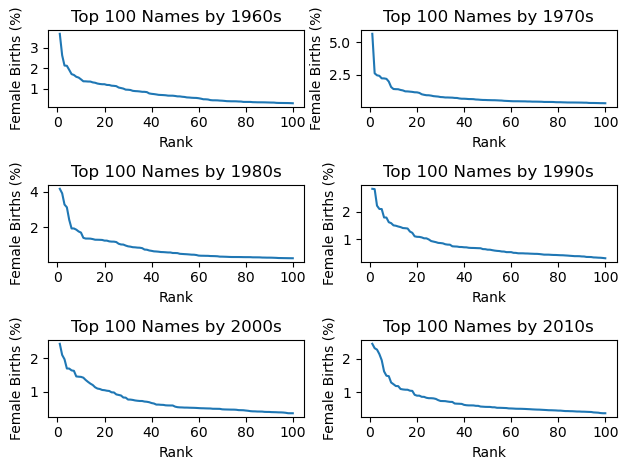

In [37]:
def scrape_names_data(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, 'html5lib')
    
    #get table same as q3
    table = soup.find('table', class_='t-stripe')
    rows = table.find_all('tr')[1:]  # Skip header
    
    #get female data
    female_names = []
    total_female_births = 0
    
    for row in rows:
        cols = row.find_all('td')
        if len(cols) == 5: #make sure that all 5 columns are there
            rank = int(cols[0].text.strip())
            female_name = cols[3].text.strip()
            female_count = int(cols[4].text.strip().replace(',', ''))
            total_female_births += female_count
            female_names.append((rank, female_name, female_count))
    
    return female_names[:100], total_female_births  #get the top 100

urls = {
    '1960s': 'https://www.ssa.gov/OACT/babynames/decades/names1960s.html',
    '1970s': 'https://www.ssa.gov/OACT/babynames/decades/names1970s.html',
    '1980s': 'https://www.ssa.gov/OACT/babynames/decades/names1980s.html',
    '1990s': 'https://www.ssa.gov/OACT/babynames/decades/names1990s.html',
    '2000s': 'https://www.ssa.gov/OACT/babynames/decades/names2000s.html',
    '2010s': 'https://www.ssa.gov/OACT/babynames/decades/names2010s.html'
}

#scrape for each decade
data_decade = {}
for decade, url in urls.items():
    top_names, total_births = scrape_names_data(url)
    data_decade[decade] = (top_names, total_births)

#prepare data to plot
data_plot = {}
for decade, (names, total_births) in data_decade.items():
    data_plot[decade] = [
        {'name': name, 'percent': count / total_births * 100} for _, name, count in names
    ]

#now make the small multiples plot
fig, axes = plt.subplots(3, 2)
axes = axes.flatten()
for i, (decade, data) in enumerate(data_plot.items()):
    ax = axes[i]
    names = [item['name'] for item in data]
    percentages = [item['percent'] for item in data]
    ax.plot(range(1, 101), percentages)
    ax.set_title(f"Top 100 Names by {decade}")
    ax.set_xlabel('Rank')
    ax.set_ylabel('Female Births (%)')
plt.tight_layout() #Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html, 
#had some issues with plots topping each other

<!-- END QUESTION -->

## Congratulations! You have finished P3! 

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the P3 assignment on Gradescope. 


<div class="alert alert-warning">
<strong>Warning!</strong> 
    This lab notebook will be graded a bit differently.  The `requests` module does not run properly on Gradescope.  Normally, when you upload your submission to Gradescope, it runs your code and reports the results on the test cases.  
</div>

For this assignment, the results and variables you create in your notebook will be saved out to a log file `.OTTER_LOG`.  This file will be included in your zip, when you run the export function below. 



Make sure you have run all cells in your notebook **in order** before running the cell below, so that all information gets saved to the log file correctly. The cell below will generate a zip file for you to submit. **Please save before exporting!**

If you run the notebook repeatedly, more and more information gets added to the `.OTTER_LOG` file. 

<div class="alert alert-warning">
<strong>Warning! - Clean log file</strong>     
    Before running your last single run through the notebook, clear all clear, restart the kernel, delete the `.OTTER_LOG` so that a fresh one is created. 
</div>

Your `.OTTER_LOG` file and `p3.otter` should be part of the zip submission (the export function does this automatically).  The `.OTTER_LOG` file should be less than 5MB.  

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()